## Hexapod Inverse Kinematics Sim

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, clear_output
import numpy as np

In [2]:
def Rotation_XYZ(thetaRX, thetaRY, thetaRZ):

    thetaRX = np.radians(thetaRX)
    thetaRY = np.radians(thetaRY)
    thetaRZ = np.radians(thetaRZ)

    RX = np.array([[1, 0, 0],
          [0, np.cos(thetaRX), np.sin(thetaRX)],
          [0, -np.sin(thetaRX), np.cos(thetaRX)]])

    RY = np.array([[np.cos(thetaRY), 0, -np.sin(thetaRY)],
          [0, 1, 0],
          [np.sin(thetaRY), 0, np.cos(thetaRY)]])

    RZ = np.array([[np.cos(thetaRZ), np.sin(thetaRZ), 0],
          [-np.sin(thetaRZ), np.cos(thetaRZ), 0],
          [0, 0, 1]])

    # Transposition in order to keep the rotations related to the reference:
    RX = np.transpose(RX)
    RY = np.transpose(RY)
    RZ = np.transpose(RZ)

    R = np.matmul(RZ, RY)
    R = np.matmul(R, RX)

    return R

In [3]:
def Vec_to_Quiver(Origin, Vector):
    
    # This function will prepare a (X,Y,Z) array vector coordinates to quiver format (X,Y,Z,U,V,W)
    # considering the determined origin coordinates.
    
    Vector_for_Quiver = np.array([Origin[0], Origin[1], Origin[2], Vector[0], Vector[1], Vector[2]])
    
    return Vector_for_Quiver

def Mov_Vector_Between(Origin_1, Origin_2, Vec_1, Vec_2):
    
    # This function is used to get the needed array to plot the movement of a vector using "quiver" with 3D matplotlib
    # In order to plot a moving vector between two moving vectors
    # Vec Format = np.array((X,Y,Z))
    
    # Origin_1 = The array with the XYZ coordinates of the first vector Origin
    # Origin_2 = The array with the XYZ coordinates of the second vector Origin
    # Vec_1 = Calculated Vector 1
    # Vec_1 = Calculated Vector 2
    
    # Vector Movimentation Aux:
    t1 = Origin_1[0] + Vec_1[0]
    t2 = Origin_1[1] + Vec_1[1]
    t3 = Origin_1[2] + Vec_1[2]
    
    d1 = (Origin_2[0] + Vec_2[0]) - (Origin_1[0] + Vec_1[0])
    d2 = (Origin_2[1] + Vec_2[1]) - (Origin_1[1] + Vec_1[1])
    d3 = (Origin_2[2] + Vec_2[2]) - (Origin_1[2] + Vec_1[2])
    
    Vector_Between_for_Quiver = np.array([(t1),(t2),(t3),(d1),(d2),(d3)])

    return Vector_Between_for_Quiver

In [4]:
# Hexapod Constructive Properties ========================================================================
Rground = 79.91    # Ground Base of the Hexapod Radius
Rbase = 49.659     # Mobile Platform of the Hexapod Radius

angleground = 23.47    # Ground Base - Closest Angle between the joints
anglebase = 50.03      # Mobile Platform - Closest Angle between the joints

# Calculation of the joints Angles for the definition of the base and platform vectors
a_theta1 = 90 - (angleground/2)
a_theta2 = a_theta1 + angleground
a_theta3 = a_theta2 + (360 - 3*angleground)/3
a_theta4 = a_theta3 + angleground
a_theta5 = a_theta4 + (360 - 3*angleground)/3
a_theta6 = a_theta5 + angleground

b_theta1 = 90 - (anglebase/2)
b_theta2 = b_theta1 + anglebase
b_theta3 = b_theta2 + (360 - 3*anglebase)/3
b_theta4 = b_theta3 + anglebase
b_theta5 = b_theta4 + (360 - 3*anglebase)/3
b_theta6 = b_theta5 + anglebase

# Hexapod Position in the Space = [100, 100, 0]

J = 180

a_theta1 = np.radians(a_theta1+J)
a_theta2 = np.radians(a_theta2+J)
a_theta3 = np.radians(a_theta3+J)
a_theta4 = np.radians(a_theta4+J)
a_theta5 = np.radians(a_theta5+J)
a_theta6 = np.radians(a_theta6+J)

b_theta1 = np.radians(b_theta1+J)
b_theta2 = np.radians(b_theta2+J)
b_theta3 = np.radians(b_theta3+J)
b_theta4 = np.radians(b_theta4+J)
b_theta5 = np.radians(b_theta5+J)
b_theta6 = np.radians(b_theta6+J)

# Vector a1...a6 - Location of the ground joints in the reference coordinate system:
a1 = np.array((Rground*np.cos(a_theta1), Rground*np.sin(a_theta1), 0)) + (100, 100, 0)
a2 = np.array((Rground*np.cos(a_theta2), Rground*np.sin(a_theta2), 0)) + (100, 100, 0)
a3 = np.array((Rground*np.cos(a_theta3), Rground*np.sin(a_theta3), 0)) + (100, 100, 0)
a4 = np.array((Rground*np.cos(a_theta4), Rground*np.sin(a_theta4), 0)) + (100, 100, 0)
a5 = np.array((Rground*np.cos(a_theta5), Rground*np.sin(a_theta5), 0)) + (100, 100, 0)
a6 = np.array((Rground*np.cos(a_theta6), Rground*np.sin(a_theta6), 0)) + (100, 100, 0)

# Vector b1...b6 - Location of the platform joints in the platform coordinate system:
b1 = np.array((Rbase*np.cos(b_theta1), Rbase*np.sin(b_theta1), 0))
b2 = np.array((Rbase*np.cos(b_theta2), Rbase*np.sin(b_theta2), 0))
b3 = np.array((Rbase*np.cos(b_theta3), Rbase*np.sin(b_theta3), 0))
b4 = np.array((Rbase*np.cos(b_theta4), Rbase*np.sin(b_theta4), 0))
b5 = np.array((Rbase*np.cos(b_theta5), Rbase*np.sin(b_theta5), 0))
b6 = np.array((Rbase*np.cos(b_theta6), Rbase*np.sin(b_theta6), 0))

# ==========================================================================================================
# Base Static vectors for Quiver:
a1_a2 = a2 - a1
a2_a3 = a3 - a2
a3_a4 = a4 - a3
a4_a5 = a5 - a4
a5_a6 = a6 - a5
a6_a1 = a1 - a6

Xbase1, Ybase1, Zbase1, Ubase1, Vbase1, Wbase1 = np.array([a1[0], a1[1], a1[2], a1_a2[0], a1_a2[1], a1_a2[2]])
Xbase2, Ybase2, Zbase2, Ubase2, Vbase2, Wbase2 = np.array([a2[0], a2[1], a2[2], a2_a3[0], a2_a3[1], a2_a3[2]])
Xbase3, Ybase3, Zbase3, Ubase3, Vbase3, Wbase3 = np.array([a3[0], a3[1], a3[2], a3_a4[0], a3_a4[1], a3_a4[2]])
Xbase4, Ybase4, Zbase4, Ubase4, Vbase4, Wbase4 = np.array([a4[0], a4[1], a4[2], a4_a5[0], a4_a5[1], a4_a5[2]])
Xbase5, Ybase5, Zbase5, Ubase5, Vbase5, Wbase5 = np.array([a5[0], a5[1], a5[2], a5_a6[0], a5_a6[1], a5_a6[2]])
Xbase6, Ybase6, Zbase6, Ubase6, Vbase6, Wbase6 = np.array([a6[0], a6[1], a6[2], a6_a1[0], a6_a1[1], a6_a1[2]])

# ==========================================================================================================
# Platform Coordinate System Vectors
plat_x_axis = ((30, 0, 0))
plat_y_axis = ((0, 30, 0))
plat_z_axis = ((0, 0, 30))

In [5]:
FIRST_ANI = 1

In [12]:
# Initial Center of Platform Vector (Point of Interest):
P = ((100, 100, 108))
thetaRX = 0
thetaRY = 0
thetaRZ = 0

if (FIRST_ANI == 0):
    P = P_out
    thetaRX = thetaRX_out
    thetaRY = thetaRY_out
    thetaRZ = thetaRZ_out

# Target Positions:
P_target = ((100, 100, 108))
thetaRX_target = 0
thetaRY_target = 0
thetaRZ_target = 30

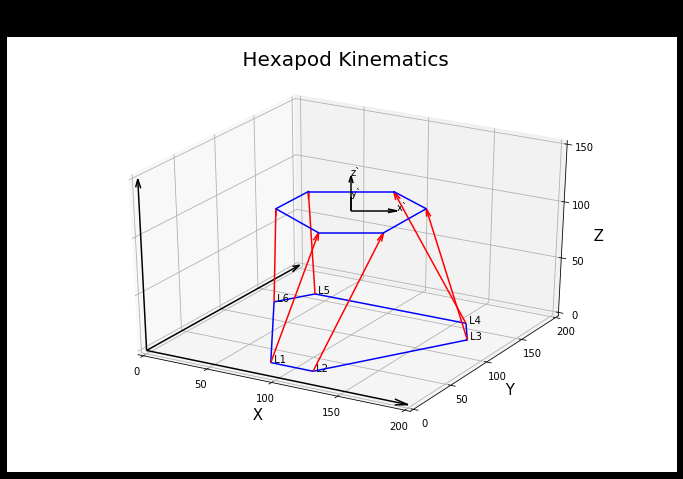

In [13]:
# ==========================================================================================================
# ==========================================================================================================
# ====================================== ~Animation Loop~ ==================================================

# Graph Properties:
fig = plt.figure(figsize=(12,8), facecolor='k')
ax = fig.add_subplot(111, projection='3d')

Xmin, Xmax = 0, 200
Ymin, Ymax = 0, 200
Zmin, Zmax = 0, 150

# Number of Frames of the movement:
frames = 60
frame_time = 0.005 #s

# Animation Loop:
for k in range(frames):
    
    # Axis Properties ======================================================================================
    # These needed to be inside the loop because the figure is cleanned every iteration
    
    ax.set_xlabel('\n X ', fontsize=15)
    ax.set_ylabel('\n Y ', fontsize=15)
    ax.set_zlabel('\n Z ', fontsize=15)
    ax.set_title('\n \n Hexapod Kinematics', fontsize=20)
    
    ax.set_xticks([0, 50, 100, 150, 200])
    ax.set_yticks([0, 50, 100, 150, 200])
    ax.set_zticks([0, 50, 100, 150])
    ax.dist = 12
    
    ax.set_xlim([Xmin, Xmax])
    ax.set_ylim([Ymin, Ymax])
    ax.set_zlim([Zmin, Zmax])
    
    ax.quiver(Xmin, 0, 0, Xmax, 0, 0, arrow_length_ratio = 0.05, color='k')
    ax.quiver(0, Ymin, 0, 0, Ymax, 0, arrow_length_ratio = 0.05, color='k')
    ax.quiver(0, 0, Zmin, 0, 0, Zmax, arrow_length_ratio = 0.05, color='k')
    
    #=======================================================================================================
    #=======================================================================================================
    
    #  Calculate Currently Values for P(X,Y,Z) and thetaRX, thetaRY, thetaRZ:
    P_cur = ((k*(P_target[0]-P[0])/frames + P[0]), (k*(P_target[1]-P[1])/frames + P[1]), (k*(P_target[2]-P[2])/frames + P[2]))
    thetaRX_cur = k*(thetaRX_target - thetaRX)/frames + thetaRX
    thetaRY_cur = k*(thetaRY_target - thetaRY)/frames + thetaRY
    thetaRZ_cur = k*(thetaRZ_target - thetaRZ)/frames + thetaRZ
    
    if (k==(frames-1)):
        P_cur = P_target
        thetaRX_cur = thetaRX_target
        thetaRY_cur = thetaRY_target
        thetaRZ_cur = thetaRZ_target
    
    #=======================================================================================================
    # INVERSE KINEMATICS:
    # Vectorial Equation to Calculate Target Leg Vector S:
    S1_cur = P_cur + Rotation_XYZ(thetaRX_cur, thetaRY_cur, thetaRZ_cur).dot(b1) - a1
    S2_cur = P_cur + Rotation_XYZ(thetaRX_cur, thetaRY_cur, thetaRZ_cur).dot(b2) - a2
    S3_cur = P_cur + Rotation_XYZ(thetaRX_cur, thetaRY_cur, thetaRZ_cur).dot(b3) - a3
    S4_cur = P_cur + Rotation_XYZ(thetaRX_cur, thetaRY_cur, thetaRZ_cur).dot(b4) - a4
    S5_cur = P_cur + Rotation_XYZ(thetaRX_cur, thetaRY_cur, thetaRZ_cur).dot(b5) - a5
    S6_cur = P_cur + Rotation_XYZ(thetaRX_cur, thetaRY_cur, thetaRZ_cur).dot(b6) - a6
  
    # Currently Target Position Vectors for Legs ready for Quiver:
    XS1, YS1, ZS1, US1, VS1, WS1 = Vec_to_Quiver(a1, S1_cur)
    XS2, YS2, ZS2, US2, VS2, WS2 = Vec_to_Quiver(a2, S2_cur)
    XS3, YS3, ZS3, US3, VS3, WS3 = Vec_to_Quiver(a3, S3_cur)
    XS4, YS4, ZS4, US4, VS4, WS4 = Vec_to_Quiver(a4, S4_cur)
    XS5, YS5, ZS5, US5, VS5, WS5 = Vec_to_Quiver(a5, S5_cur)
    XS6, YS6, ZS6, US6, VS6, WS6 = Vec_to_Quiver(a6, S6_cur)
    
    ax.quiver(XS1, YS1, ZS1, US1, VS1, WS1, arrow_length_ratio = 0.06, color='r')
    ax.quiver(XS2, YS2, ZS2, US2, VS2, WS2, arrow_length_ratio = 0.06, color='r')
    ax.quiver(XS3, YS3, ZS3, US3, VS3, WS3, arrow_length_ratio = 0.06, color='r')
    ax.quiver(XS4, YS4, ZS4, US4, VS4, WS4, arrow_length_ratio = 0.06, color='r')
    ax.quiver(XS5, YS5, ZS5, US5, VS5, WS5, arrow_length_ratio = 0.06, color='r')
    ax.quiver(XS6, YS6, ZS6, US6, VS6, WS6, arrow_length_ratio = 0.06, color='r')
    
    # Ground Base Fixed Vectors =============================================================================  
    ax.quiver(Xbase1, Ybase1, Zbase1, Ubase1, Vbase1, Wbase1, arrow_length_ratio = 0.01, color='b')
    ax.quiver(Xbase2, Ybase2, Zbase2, Ubase2, Vbase2, Wbase2, arrow_length_ratio = 0.01, color='b')
    ax.quiver(Xbase3, Ybase3, Zbase3, Ubase3, Vbase3, Wbase3, arrow_length_ratio = 0.01, color='b')
    ax.quiver(Xbase4, Ybase4, Zbase4, Ubase4, Vbase4, Wbase4, arrow_length_ratio = 0.01, color='b')
    ax.quiver(Xbase5, Ybase5, Zbase5, Ubase5, Vbase5, Wbase5, arrow_length_ratio = 0.01, color='b')
    ax.quiver(Xbase6, Ybase6, Zbase6, Ubase6, Vbase6, Wbase6, arrow_length_ratio = 0.01, color='b')
    
    # Currently Platform Base Vectors =======================================================================
    Xplat1, Yplat1, Zplat1, Uplat1, Vplat1, Wplat1 = Mov_Vector_Between(a1, a2, S1_cur, S2_cur)
    Xplat2, Yplat2, Zplat2, Uplat2, Vplat2, Wplat2 = Mov_Vector_Between(a2, a3, S2_cur, S3_cur)
    Xplat3, Yplat3, Zplat3, Uplat3, Vplat3, Wplat3 = Mov_Vector_Between(a3, a4, S3_cur, S4_cur)
    Xplat4, Yplat4, Zplat4, Uplat4, Vplat4, Wplat4 = Mov_Vector_Between(a4, a5, S4_cur, S5_cur)
    Xplat5, Yplat5, Zplat5, Uplat5, Vplat5, Wplat5 = Mov_Vector_Between(a5, a6, S5_cur, S6_cur)
    Xplat6, Yplat6, Zplat6, Uplat6, Vplat6, Wplat6 = Mov_Vector_Between(a6, a1, S6_cur, S1_cur)
    
    ax.quiver(Xplat1, Yplat1, Zplat1, Uplat1, Vplat1, Wplat1, arrow_length_ratio = 0.01, color='b')
    ax.quiver(Xplat2, Yplat2, Zplat2, Uplat2, Vplat2, Wplat2, arrow_length_ratio = 0.01, color='b')
    ax.quiver(Xplat3, Yplat3, Zplat3, Uplat3, Vplat3, Wplat3, arrow_length_ratio = 0.01, color='b')
    ax.quiver(Xplat4, Yplat4, Zplat4, Uplat4, Vplat4, Wplat4, arrow_length_ratio = 0.01, color='b')
    ax.quiver(Xplat5, Yplat5, Zplat5, Uplat5, Vplat5, Wplat5, arrow_length_ratio = 0.01, color='b')
    ax.quiver(Xplat6, Yplat6, Zplat6, Uplat6, Vplat6, Wplat6, arrow_length_ratio = 0.01, color='b')
   
    # =========================================================================================================
    # =========================================================================================================
    # Plot Platform Axis Movement
    
    plat_x_axis_cur = Rotation_XYZ(thetaRX_cur, thetaRY_cur, thetaRZ_cur).dot(plat_x_axis)
    plat_y_axis_cur = Rotation_XYZ(thetaRX_cur, thetaRY_cur, thetaRZ_cur).dot(plat_y_axis)
    plat_z_axis_cur = Rotation_XYZ(thetaRX_cur, thetaRY_cur, thetaRZ_cur).dot(plat_z_axis)
    
    Xplatx, Yplatx, Zplatx, Uplatx, Vplatx, Wplatx = Vec_to_Quiver(P_cur, plat_x_axis_cur)
    Xplaty, Yplaty, Zplaty, Uplaty, Vplaty, Wplaty = Vec_to_Quiver(P_cur, plat_y_axis_cur)
    Xplatz, Yplatz, Zplatz, Uplatz, Vplatz, Wplatz = Vec_to_Quiver(P_cur, plat_z_axis_cur)
    
    ax.quiver(Xplatx, Yplatx, Zplatx, Uplatx, Vplatx, Wplatx, arrow_length_ratio = 0.2, color='k')
    ax.quiver(Xplaty, Yplaty, Zplaty, Uplaty, Vplaty, Wplaty, arrow_length_ratio = 0.2, color='k')
    ax.quiver(Xplatz, Yplatz, Zplatz, Uplatz, Vplatz, Wplatz, arrow_length_ratio = 0.2, color='k')

    # Platform Axis Text:
    zdir = (0,0,0)
    
    (x_x, x_y, x_z) = P_cur + Rotation_XYZ(thetaRX_cur, thetaRY_cur, thetaRZ_cur).dot(plat_x_axis)
    (y_x, y_y, y_z) = P_cur + Rotation_XYZ(thetaRX_cur, thetaRY_cur, thetaRZ_cur).dot(plat_y_axis)
    (z_x, z_y, z_z) = P_cur + Rotation_XYZ(thetaRX_cur, thetaRY_cur, thetaRZ_cur).dot(plat_z_axis)
   
    ax.text(x_x, x_y, x_z, 'x`', zdir)
    ax.text(y_x, y_y, y_z, 'y`', zdir)
    ax.text(z_x, z_y, z_z, 'z`', zdir)
    
    # Legs Number Text:
    ax.text(a1[0], a1[1], a1[2], ' L1', zdir)
    ax.text(a2[0], a2[1], a2[2], ' L2', zdir)
    ax.text(a3[0], a3[1], a3[2], ' L3', zdir)
    ax.text(a4[0], a4[1], a4[2], ' L4', zdir)
    ax.text(a5[0], a5[1], a5[2], ' L5', zdir)
    ax.text(a6[0], a6[1], a6[2], ' L6', zdir)
    
    # Output State to be used as pos feedback:
    P_out = P_cur
    thetaRX_out = thetaRX_cur
    thetaRY_out = thetaRY_cur
    thetaRZ_out = thetaRZ_cur
    
    FIRST_ANI = 0
    
    # Display Figure Config for Jupyter =======================================================================
    display(fig)
    clear_output(wait = True)
    plt.pause(frame_time)
    ax.cla()

In [10]:
print('Leg 1 length:', np.linalg.norm(S1_cur), 'units')
print('Leg 2 length:', np.linalg.norm(S2_cur), 'units')
print('Leg 3 length:', np.linalg.norm(S3_cur), 'units')
print('Leg 4 length:', np.linalg.norm(S4_cur), 'units')
print('Leg 5 length:', np.linalg.norm(S5_cur), 'units')
print('Leg 6 length:', np.linalg.norm(S6_cur), 'units')

Leg 1 length: 131.86027750402786 units
Leg 2 length: 140.39851092549745 units
Leg 3 length: 135.36568832143868 units
Leg 4 length: 113.01109825914014 units
Leg 5 length: 106.33301401217837 units
Leg 6 length: 102.06701152849641 units
